<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Clustering_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Import Modules

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from warnings import filterwarnings
filterwarnings('ignore')

# Load Data

In [8]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/sklearn_kmeans_drivers.csv
df = pd.read_csv('sklearn_kmeans_drivers.csv', sep='\t', header=0)

--2020-12-14 18:31:32--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/sklearn_kmeans_drivers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85448 (83K) [text/plain]
Saving to: ‘sklearn_kmeans_drivers.csv.1’

sklearn_kmeans_driv 100%[===================>]  83.45K  --.-KB/s    in 0.006s  

2020-12-14 18:31:32 (14.7 MB/s) - ‘sklearn_kmeans_drivers.csv.1’ saved [85448/85448]



# Understand Data & Pre-Process

In [10]:
df.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [30]:
X = df.iloc[:,1:].values
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

## Elbow method - estimate # cluster geometrically

Optimum k-value is : 2


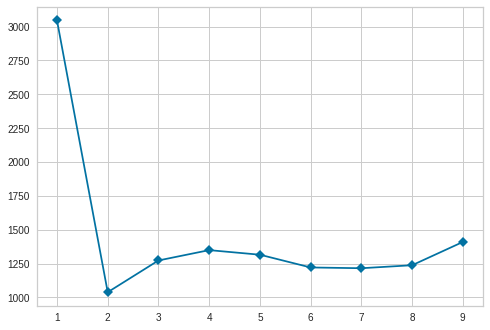

In [42]:
try:
    elbow = KElbowVisualizer(KMeans(random_state=4), k=(1,10), timings=False)
    elbow.fit(X)
    elbow.show()
except AttributeError:
    ;       # Ignore. Attribute not found because data is not fitted into KMeans model yet.

scores = elbow.k_scores_
k_best = elbow.k_values_[scores.index(min(scores))]

# Graph : k vs distortion score (lower is preferred)
print(f"Optimum k-value is : {k_best}")

# Train Model

In [47]:
def plot_graph(X, model):
    plt.style.use('default')
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
    plt.plot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 'r*')
    plt.xlabel('Distance (Miles per day)')
    plt.ylabel('Speed (Miles per hour)')
    plt.show() 

## k = 2 (estimated from Elbow method)

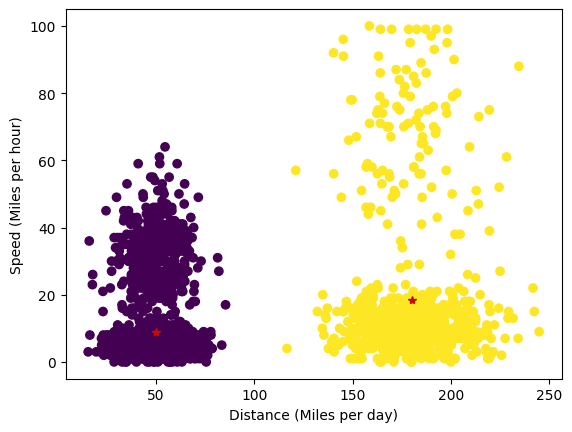

In [48]:
model = KMeans(n_clusters=k_best).fit(X)
plot_graph(X, model)

# Model suggested two data clusters : short and long distance

## k = 4 (experiment)

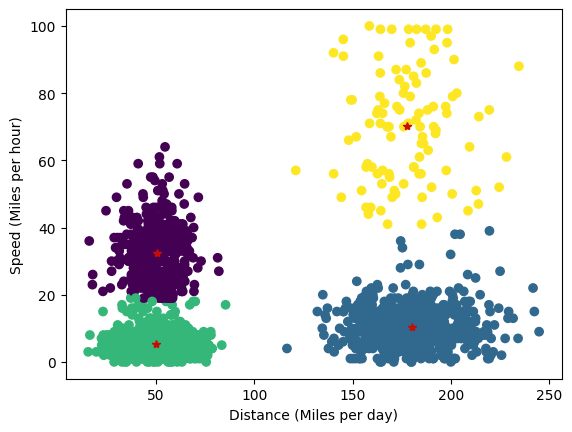

In [49]:
model = KMeans(n_clusters=4).fit(X)
plot_graph(X, model)

# 4 Clusters: short vs long distance & high vs low speed